# Linear regression homework with Yelp votes

## Introduction

This assignment uses a small subset of the data from Kaggle's [Yelp Business Rating Prediction](https://www.kaggle.com/c/yelp-recsys-2013) competition.

**Description of the data:**

- `yelp.json` is the original format of the file. `yelp.csv` contains the same data, in a more convenient format. Both of the files are in this repo, so there is no need to download the data from the Kaggle website.
- Each observation in this dataset is a review of a particular business by a particular user.
- The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.
- The "cool" column is the number of "cool" votes this review received from other Yelp users. All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.
- The "useful" and "funny" columns are similar to the "cool" column.

## Task 1

Read `yelp.csv` into a DataFrame.

In [1]:
# access yelp.csv using a relative path
import pandas as pd
yelp = pd.read_csv('../data/yelp.csv')
yelp.head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0


## Task 1 (Bonus)

Ignore the `yelp.csv` file, and construct this DataFrame yourself from `yelp.json`. This involves reading the data into Python, decoding the JSON, converting it to a DataFrame, and adding individual columns for each of the vote types.

In [2]:
# read the data from yelp.json into a list of rows
# each row is decoded into a dictionary named "data" using using json.loads()
import json
with open('../data/yelp.json', 'rU') as f:
    data = [json.loads(row) for row in f]

In [3]:
# show the first review
print data[0]

{u'votes': {u'funny': 0, u'useful': 5, u'cool': 2}, u'user_id': u'rLtl8ZkDX5vH5nAx9C3q5Q', u'review_id': u'fWKvX83p0-ka4JS3dc6E5A', u'text': u'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever

In [4]:
# convert the list of dictionaries to a DataFrame
#df = pd.read_json('../data/yelp.json')

with open('../data/yelp.json', 'rb') as f:
    data = f.readlines()

# Converting individual JSON objects into an array of JSON objects
data_json_str = "[" + ','.join(data) + "]"

# loading array into pandas
df = pd.read_json(data_json_str)

df.head()

,business_id,date,review_id,stars,text,type,user_id,votes
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,"{u'funny': 0, u'useful': 5, u'cool': 2}"
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,"{u'funny': 0, u'useful': 0, u'cool': 0}"
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,"{u'funny': 0, u'useful': 1, u'cool': 0}"
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,"{u'funny': 0, u'useful': 2, u'cool': 1}"
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,"{u'funny': 0, u'useful': 0, u'cool': 0}"


## Task 2

Explore the relationship between each of the vote types (cool/useful/funny) and the number of stars.

In [7]:
# treat stars as a categorical variable and look for differences between groups by comparing the means of the groups
yelp.groupby('stars').mean()

,cool,useful,funny
stars,,,
1,0.576769,1.604806,1.056075
2,0.719525,1.563107,0.875944
3,0.788501,1.306639,0.694730
4,0.954623,1.395916,0.670448
5,0.944261,1.381780,0.608631


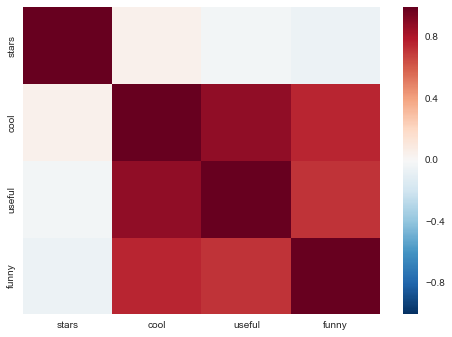

In [8]:
# display acorrelation matrix of the vote types (cool/useful/funny) and stars
%matplotlib inline
import seaborn as sns
sns.heatmap(yelp.corr())

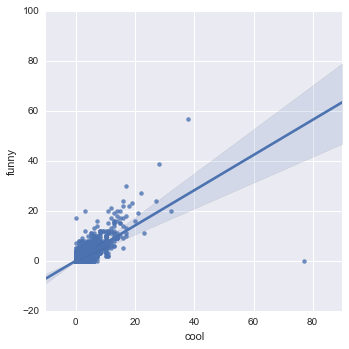

In [9]:
# display multiple scatter plots (cool, useful, funny) with linear regression line
sns.lmplot(x='cool', y='funny', data=yelp)

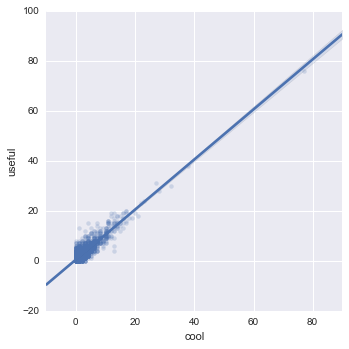

In [10]:
# display multiple scatter plots (cool, useful, funny) with linear regression line
sns.lmplot(x='cool', y='useful', data=yelp, scatter_kws={'alpha': 0.2})

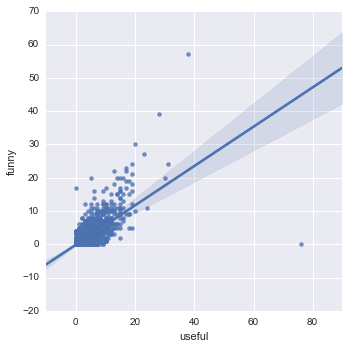

In [12]:
# display multiple scatter plots (cool, useful, funny) with linear regression line
sns.lmplot(x='useful', y='funny', data=yelp)

## Task 3

Define cool/useful/funny as the feature matrix X, and stars as the response vector y.

In [13]:
feature_cols = ['cool', 'useful', 'funny']
x = yelp[feature_cols]
y = yelp.stars

## Task 4

Fit a linear regression model and interpret the coefficients. Do the coefficients make intuitive sense to you? Explore the Yelp website to see if you detect similar trends.

In [14]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
print linreg.intercept_
print linreg.coef_

3.83989479278
[ 0.27435947 -0.14745239 -0.13567449]


## Interpretation:

The linrer.intercept coefficient of ~3.84 is the number of stars that our model predicts a review will give if all of the feature variables are held at 0.
Each of the linear regression coefficients correspond to their ordered feature variable (cool, funny, and useful), indicating how much the star rating is predicted to increase based on a 1 unit increase in its feature variable.

## Task 5

Evaluate the model by splitting it into training and testing sets and computing the RMSE. Does the RMSE make intuitive sense to you?

In [16]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import numpy as np

In [20]:
# define a function that accepts a list of features and returns testing RMSE
def train_test_rmse(feature_cols):
    X = yelp[feature_cols]
    y = yelp.stars
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5000)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [22]:
# calculate RMSE with all three features
print train_test_rmse(['cool','useful','funny'])

1.19813282166


## Task 6

Try removing some of the features and see if the RMSE improves.

In [32]:
features= ['cool','useful','funny']
for item in features:
    rmse = train_test_rmse([item])
    print 'RMSE for model containing ', item,':', rmse

for item in features:
    new_lst=[x for x in features if x!=item]
    for thing in new_lst:
        rmse = train_test_rmse([item, thing])
        print 'RMSE for model containing ', item, 'and ', thing,':', rmse
    features.remove(item)

RMSE for model containing  cool : 1.2363546032
RMSE for model containing  useful : 1.23667933496
RMSE for model containing  funny : 1.23296889814
RMSE for model containing  cool and  useful : 1.2169012302
RMSE for model containing  cool and  funny : 1.21187207762
RMSE for model containing  funny and  useful : 1.23235788086


## Task 7 (Bonus)

Think of some new features you could create from the existing data that might be predictive of the response. Figure out how to create those features in Pandas, add them to your model, and see if the RMSE improves.

In [33]:
#bikes['daytime'] = [1 if x >= 7 and x <=20  else 0 for x in bikes['hour']]
#date = yelp.at[0,'date']
#date= int(date[:4])
#print date
# new feature: 
yelp['date_year']= [int(x[0:4]) for x in yelp['date']]
yelp['date_month']= [int(x[5:7]) for x in yelp['date']]
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,date_year,date_month
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,2011,1
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,2011,7
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,2012,6
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,2010,5
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,2012,1


In [34]:
yelp.groupby('date_year').mean()

,stars,cool,useful,funny,date_month
date_year,,,,,
2005,3.250000,2.000000,2.500000,0.250000,7.500000
2006,3.709091,0.581818,0.927273,0.363636,6.854545
2007,3.835088,1.715789,2.073684,1.185965,6.835088
2008,3.743791,2.279739,2.820915,1.751634,6.973856
2009,3.754056,1.776260,2.310845,1.396243,6.436379
2010,3.796436,0.822894,1.377430,0.656048,6.522138
2011,3.787173,0.556790,1.112863,0.466141,6.383017
2012,3.766942,0.434711,0.955372,0.379504,6.253223
2013,4.019231,0.423077,0.576923,0.288462,1.000000


In [35]:
yelp.groupby('date_month').mean()

,stars,cool,useful,funny,date_year
date_month,,,,,
1,3.823402,0.928494,1.388949,0.731311,2010.798483
2,3.795670,0.940460,1.451962,0.801083,2010.518268
3,3.819890,0.733702,1.277348,0.554696,2010.480663
4,3.743163,0.848989,1.606421,0.680143,2010.652794
5,3.742925,0.878538,1.581368,0.714623,2010.560142
6,3.760256,0.989744,1.721795,0.771795,2010.639744
7,3.787879,0.840629,1.444444,0.684624,2010.471380
8,3.748652,0.847896,1.310680,0.700108,2010.423948
9,3.820153,1.003827,1.403061,0.899235,2010.441327


In [36]:
# add new features to the model and calculate RMSE
print train_test_rmse(['date_year','date_month'])
print train_test_rmse(['date_year'])
print train_test_rmse(['date_month'])

1.2373300661
1.23739851524
1.23733162623


In [39]:
print train_test_rmse(['cool','funny','useful','date_year','date_month'])

1.19760434656


## Task 8 (Bonus)

Compare your best RMSE on the testing set with the RMSE for the "null model", which is the model that ignores all features and simply predicts the mean response value in the testing set.

In [40]:
#My lowest RMSE was from the last model 
features = ['cool','funny','useful','date_year','date_month']
X = yelp[features]
y = yelp.stars
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5000)

y_null = np.zeros_like(y_test, dtype=float)

y_null.fill(y_test.mean())
y_null

[ 0.  0.  0. ...,  0.  0.  0.]


array([ 3.7596,  3.7596,  3.7596, ...,  3.7596,  3.7596,  3.7596])

In [41]:
# compute null RMSE
np.sqrt(metrics.mean_squared_error(y_test, y_null))

1.2371773680438871